In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import torch
import warnings

### Extract data

In [34]:
x_train = np.loadtxt('x_train.csv', delimiter=',')
y_train = np.loadtxt('y_train.csv', delimiter=',')
x_test = np.loadtxt('x_test.csv', delimiter=',')
y_test = np.loadtxt('y_test.csv', delimiter=',')

unique_label, frequencies = np.unique(y_train, return_counts=True)
class_frequency = frequencies/len(y_train)
print("Class frequency: ", class_frequency)



Class frequency:  [0.52087534 0.09551062 0.25272803 0.04693986 0.08394615]


### 1.2 Classification

### 1.2.1 Multi-nominal logistic regression

In [25]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2, random_state=42)
warnings.filterwarnings('ignore')
model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(x_train, y_train)

y_pred_1 = model.predict(x_val)
y_pred_2 = model.predict(x_test)

loss_val = metrics.zero_one_loss(y_val, y_pred_1)
loss_test = metrics.zero_one_loss(y_test, y_pred_2)

print('Log Loss for validation:', loss_val, 'Log Loss for test:', loss_test)


Log Loss for validation: 0.1543365455893254 Log Loss for test: 0.09884180994173086


### 1.2.2

In [26]:
rf_50 = RandomForestClassifier(max_depth= 50).fit(x_train, y_train)
rf_100 = RandomForestClassifier(max_depth= 100).fit(x_train, y_train)
rf_200 = RandomForestClassifier(max_depth= 200).fit(x_train, y_train)

rt_pred_val_50 = rf_50.predict(x_val)
rt_pred_val_100 = rf_100.predict(x_val)
rt_pred_val_200 = rf_200.predict(x_val)

rt_pred_test_50 = rf_50.predict(x_test)
rt_pred_test_100 = rf_100.predict(x_test)
rt_pred_test_200 = rf_200.predict(x_test)


loss__val_50  = metrics.zero_one_loss(y_val, rt_pred_val_50)
loss__val_100 = metrics.zero_one_loss(y_val, rt_pred_val_100)
loss__val_200 = metrics.zero_one_loss(y_val, rt_pred_val_200)

loss__test_50  = metrics.zero_one_loss(y_test, rt_pred_test_50)
loss__test_100 = metrics.zero_one_loss(y_test, rt_pred_test_100)
loss__test_200 = metrics.zero_one_loss(y_test, rt_pred_test_200)

In [27]:

print('loss_val_50  =', loss__val_50)
print('loss_val_100 =', loss__val_100)
print('loss_val_200 =', loss__val_200)

print('loss_test_50 = ', loss__test_50)
print('loss_test_100 =', loss__test_100)
print('loss_test_200 =', loss__test_200)


loss_val_50  = 0.15255744996293552
loss_val_100 = 0.15003706449221643
loss_val_200 = 0.15270570793180138
loss_test_50 =  0.10970433781742317
loss_test_100 = 0.11114308323142219
loss_test_200 = 0.11193439320912169


### 1.2.3

In [ ]:
best_k = None
best_val_score = float('-inf')

for k in range(160, 200): 
    nbrs = KNeighborsClassifier(n_neighbors= k).fit(x_train, y_train)
    scores = cross_val_score(nbrs, x_train, y_train, cv=5, scoring='accuracy')

    mean_score = scores.mean()
    
    print("Mean Score for k =", k, ":", mean_score)

    if mean_score > best_val_score:
        best_val_score = mean_score
        best_k = k
    
    print("Best k:", best_k)

In [38]:
param_grid = {'n_neighbors': np.arange(1, 200)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

print("Best k:", grid.best_params_['n_neighbors'])  
print("Best loss score:", grid.best_score_)

In [ ]:

y_pred_val = nbrs.predict(x_val)
y_pred_test = nbrs.predict(x_test)

knn_loss_val = metrics.zero_one_loss(y_val, y_pred_val)
knn_loss_test = metrics.zero_one_loss(y_test, y_pred_test)

print(" knn Validation Loss for k =", best_k, ":", knn_loss_val)
print(" knn Test Loss for k =", best_k, ":", knn_loss_test)


 knn Validation Loss for k = 31 : 0.15641215715344703
 knn Test Loss for k = 31 : 0.09855406085893104


### 3 Differentiable programming (35 points)

##### 3.1 Steepest descent

In [ ]:
p_f = 0.5  # some parameter changing the shape of the function
# Quadratic function
def f(x, y):
    return (p_f*x)**2 + y**2 + p_f*x*y
# Gradient of the function
def df(x, y):
    return (p_f**2)*2*x + p_f*y, 2*y + p_f*x, 

In [ ]:
eta = 0.5
n_iter = 4
r = 1.

x = torch . empty (1 , requires_grad = True )
y = torch . empty (1 , requires_grad = True )
torch . nn . init . constant_ (x , 0.9 * r )
torch . nn . init . constant_ (y , 0.8 * r )

external_gradient = torch.tensor([1.])

p_x = [torch.Tensor.item(x)]
p_y = [torch.Tensor.item(y)]

for i in range (n_iter):
    Q=(p_f*x)**2 + y**2 + p_f*x*y
    Q.backward(gradient=external_gradient)
    torch.optim.SGD([x, y], lr=eta).step()
    x.grad.zero_()
    y.grad.zero_()
    p_x.append(torch.Tensor.item(x))
    p_y.append(torch.Tensor.item(y))

print(p_x)
print(p_y)

[0.8999999761581421, 0.47499996423721313, 0.41249996423721313, 0.3390624523162842, 0.28007808327674866]
[0.800000011920929, -0.22499996423721313, -0.11874999105930328, -0.10312499105930328, -0.08476561307907104]


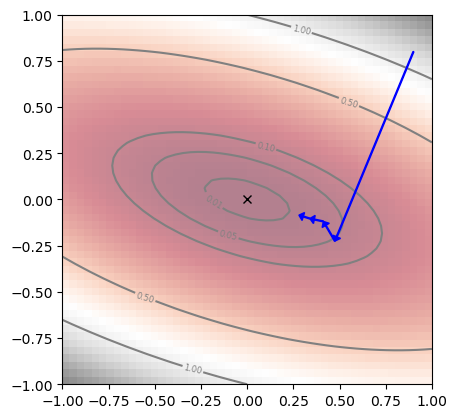

In [ ]:
# Make contour plot
x = np.linspace(-r, r, 50)
y = np.linspace(-r, r, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
contours = plt.contour(X, Y, Z, [0.01, 0.05, 0.1, 0.5, 1.], colors='grey')
plt.clabel(contours, inline=True, fontsize=6)
plt.imshow(Z, extent=[-r, r, -r, r], origin='lower', cmap='RdGy', alpha=0.5)

# Add optimum
plt.plot(0, 0, 'x', c='k')

# Plot gradient steps
for i in range(n_iter):
    plt.arrow(p_x[i], p_y[i], p_x[i+1]-p_x[i], 
    p_y[i+1]-p_y[i], width=.005, head_width=.045, 
    head_length=.025, length_includes_head=True, fc='b', ec='b', zorder=10)